### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  ## for visualization
import matplotlib.pyplot as plt  ## for visualization 
%matplotlib inline 
import warnings  ## to suppress warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

### Loaading in Dataset

In [2]:
df = pd.read_csv("recs2009.csv", low_memory=False)

### Data Inspection

In [3]:
df.shape

(12083, 940)

In [4]:
df.head()

DOEID  REGIONC  DIVISION  REPORTABLE_DOMAIN  TYPEHUQ   NWEIGHT  HDD65  \
0      1        2         4                 12        2   2471.68   4742   
1      2        4        10                 26        2   8599.17   2662   
2      3        1         1                  1        5   8969.92   6233   
3      4        2         3                  7        2  18003.64   6034   
4      5        1         1                  1        3   5999.61   5388   

   CDD65  HDD30YR  CDD30YR  ...  SCALEKER  IECC_Climate_Pub HDD50 CDD80  \
0   1080     4953     1271  ...        -2                4A  2117    56   
1    199     2688      143  ...        -2                3C    62    26   
2    505     5741      829  ...        -2                5A  2346    49   
3    672     5781      868  ...        -2                5A  2746     0   
4    702     5313      797  ...        -2                5A  2251     0   

   GND_HDD65   WSF  OA_LAT  GWT  DesignDBT99  DesignDBT1  
0       4250  0.48       6   56            9          96  
1       2393  0.61       0   64           38          73  
2       5654  0.48       3   52           12          88  
3       4941  0.55       4   55            7          87  
4       5426  0.61       4   50           13          90  

[5 rows x 940 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


In [6]:
df.columns

Index(['DOEID', 'REGIONC', 'DIVISION', 'REPORTABLE_DOMAIN', 'TYPEHUQ',
       'NWEIGHT', 'HDD65', 'CDD65', 'HDD30YR', 'CDD30YR',
       ...
       'SCALEKER', 'IECC_Climate_Pub', 'HDD50', 'CDD80', 'GND_HDD65', 'WSF',
       'OA_LAT', 'GWT', 'DesignDBT99', 'DesignDBT1'],
      dtype='object', length=940)

In [7]:
df.isna().sum().sum()

0

In [8]:
## Checking the data type of each variable

for col in df.columns:
    print(col)
    print(df[col].dtype, '\n')

DOEID
int64 

REGIONC
int64 

DIVISION
int64 

REPORTABLE_DOMAIN
int64 

TYPEHUQ
int64 

NWEIGHT
float64 

HDD65
int64 

CDD65
int64 

HDD30YR
int64 

CDD30YR
int64 

Climate_Region_Pub
int64 

AIA_Zone
int64 

METROMICRO
object 

UR
object 

KOWNRENT
int64 

CONDCOOP
int64 

YEARMADE
int64 

YEARMADERANGE
int64 

OCCUPYYRANGE
int64 

CONVERSION
int64 

ORIG1FAM
int64 

LOOKLIKE
int64 

NUMFLRS
int64 

NUMAPTS
int64 

WALLTYPE
int64 

ROOFTYPE
int64 

STUDIO
int64 

NAPTFLRS
int64 

STORIES
int64 

TYPEHUQ4
int64 

BEDROOMS
int64 

NCOMBATH
int64 

NHAFBATH
int64 

OTHROOMS
int64 

TOTROOMS
int64 

CELLAR
int64 

CRAWL
int64 

CONCRETE
int64 

BASEFIN
int64 

FINBASERMS
int64 

BASEHEAT
int64 

BASEHT2
int64 

PCTBSTHT
int64 

BASECOOL
int64 

BASECL2
int64 

PCTBSTCL
int64 

BASEUSE
int64 

ATTIC
int64 

ATTICFIN
int64 

FINATTRMS
int64 

ATTCHEAT
int64 

ATTCHT2
int64 

PCTATTHT
int64 

ATTCCOOL
int64 

ATTCCL2
int64 

PCTATTCL
int64 

ATTICUSE
int64 

PRKGPLC1
int64 

SIZEOFGARAGE
i

In [9]:
### Splitting into Categorical and numerical variables for further data inspection

cat = [ "METROMICRO", "UR", "IECC_Climate_Pub"]
num = [col for col in df.columns if col not in cat + ['DOEID','KWH']]

In [10]:
## Inspecting the Categorical Columns

for col in df.columns:
    if col in cat:
        print(col)
        print(df[col].unique(), '\n')
        print(df[col].value_counts(), '\n')

METROMICRO
['METRO' 'MICRO' 'NONE'] 

METRO    10302
MICRO     1109
NONE       672
Name: METROMICRO, dtype: int64 

UR
['U' 'R'] 

U    9656
R    2427
Name: UR, dtype: int64 

IECC_Climate_Pub
['4A' '3C' '5A' '6A-6B' '1A-2A' '3B-4B' '3A' '5B-5C' '7A-7B-7AK-8AK' '2B'
 '4C'] 

4A               2703
5A               2402
1A-2A            1740
3B-4B            1523
3A               1235
6A-6B             971
5B-5C             476
3C                368
4C                312
2B                209
7A-7B-7AK-8AK     144
Name: IECC_Climate_Pub, dtype: int64 



In [11]:
## Inspecting the Numerical Columns

for col in df.columns:
    if col in num:
        print(col)
        print(df[col].unique(), '\n')
        print(df[col].value_counts(), '\n')

REGIONC
[2 4 1 3] 

3    4090
4    2884
2    2843
1    2266
Name: REGIONC, dtype: int64 

DIVISION
[ 4 10  1  3  2  5  8  7  6  9] 

5     2246
10    2072
4     1693
2     1328
7     1230
3     1150
1      938
6      614
8      445
9      367
Name: DIVISION, dtype: int64 

REPORTABLE_DOMAIN
[12 26  1  7 10  3 17  5  4 27 15 23 14 16 22  9  2 21 18 11 25 19 24 20
  8  6 13] 

26    1606
21     991
17     948
3      839
10     699
12     686
2      501
27     466
15     440
1      437
7      386
18     365
16     349
11     308
22     295
5      285
13     281
8      274
19     249
6      248
9      242
20     239
14     228
24     226
4      204
23     150
25     141
Name: REPORTABLE_DOMAIN, dtype: int64 

TYPEHUQ
[2 5 3 4 1] 

2    7803
5    1923
4     926
3     890
1     541
Name: TYPEHUQ, dtype: int64 

NWEIGHT
[2471.68 8599.17 8969.92 ... 8980.27 3155.97 8689.07] 

7169.31     149
4751.97     108
6297.04      96
2778.26      86
5629.10      72
           ... 
9535.68       1
12120.7

[ 0 -2  1] 

-2    6556
 0    5325
 1     202
Name: TVAUDIOSYS3, dtype: int64 

OTHERSTB3
[ 0 -2  1] 

-2    6556
 0    5484
 1      43
Name: OTHERSTB3, dtype: int64 

TVONWD3
[ 3 -2  2  1  5  4] 

-2    6556
 1    2791
 2    1776
 3     645
 4     196
 5     119
Name: TVONWD3, dtype: int64 

TVONWDWATCH3
[-2  0  4  3  2  1] 

-2    11239
 4      317
 3      140
 0      134
 2      128
 1      125
Name: TVONWDWATCH3, dtype: int64 

TVONWE3
[ 2 -2  1  5  3  4] 

-2    6556
 1    2603
 2    1705
 3     755
 4     297
 5     167
Name: TVONWE3, dtype: int64 

TVONWEWATCH3
[-2  0  4  3  2  1] 

-2    11239
 4      288
 3      156
 2      136
 1      135
 0      129
Name: TVONWEWATCH3, dtype: int64 

COMPUTER
[1 0] 

1    9469
0    2614
Name: COMPUTER, dtype: int64 

NUMPC
[ 2  1  0  5  4  3  7  6 15  8  9 10] 

1     4979
2     2738
0     2614
3     1099
4      420
5      142
6       58
8       15
7       12
9        3
10       2
15       1
Name: NUMPC, dtype: int64 

PCTYPE1
[ 1  2 -2] 

 

[0 1] 

0    12081
1        2
Name: ZMONITOR3, dtype: int64 

ZTIMEON3
[0 1] 

0    12078
1        5
Name: ZTIMEON3, dtype: int64 

ZPCONOFF3
[0 1] 

0    12075
1        8
Name: ZPCONOFF3, dtype: int64 

ZPCSLEEP3
[0 1] 

0    12077
1        6
Name: ZPCSLEEP3, dtype: int64 

ZINTERNET
[0 1] 

0    12072
1       11
Name: ZINTERNET, dtype: int64 

ZINDIALUP
[0 1] 

0    12036
1       47
Name: ZINDIALUP, dtype: int64 

ZINDSL
[0 1] 

0    11992
1       91
Name: ZINDSL, dtype: int64 

ZINCABLE
[0 1] 

0    12015
1       68
Name: ZINCABLE, dtype: int64 

ZINSATEL
[0 1] 

0    12020
1       63
Name: ZINSATEL, dtype: int64 

ZINWIRELESS
[0 1] 

0    12028
1       55
Name: ZINWIRELESS, dtype: int64 

ZPCPRINT
[0 1] 

0    12073
1       10
Name: ZPCPRINT, dtype: int64 

ZFAX
[0 1] 

0    12078
1        5
Name: ZFAX, dtype: int64 

ZCOPIER
[0 1] 

0    12074
1        9
Name: ZCOPIER, dtype: int64 

ZWELLPUMP
[0 1] 

0    12050
1       33
Name: ZWELLPUMP, dtype: int64 

ZDIPSTICK
[0 1] 

0    120

[0 1] 

0    12077
1        6
Name: ZTHERMAIN, dtype: int64 

ZNUMTHERM
[0 1] 

0    12076
1        7
Name: ZNUMTHERM, dtype: int64 

ZPROTHERM
[0 1] 

0    12044
1       39
Name: ZPROTHERM, dtype: int64 

ZAUTOHEATNITE
[0 1] 

0    12056
1       27
Name: ZAUTOHEATNITE, dtype: int64 

ZAUTOHEATDAY
[0 1] 

0    12054
1       29
Name: ZAUTOHEATDAY, dtype: int64 

ZTEMPHOME
[0 1] 

0    11781
1      302
Name: ZTEMPHOME, dtype: int64 

ZTEMPGONE
[0 1] 

0    11655
1      428
Name: ZTEMPGONE, dtype: int64 

ZTEMPNITE
[0 1] 

0    11745
1      338
Name: ZTEMPNITE, dtype: int64 

ZMOISTURE
[0 1] 

0    12074
1        9
Name: ZMOISTURE, dtype: int64 

ZUSEMOISTURE
[0 1] 

0    12075
1        8
Name: ZUSEMOISTURE, dtype: int64 

NUMH2ONOTNK
[0 1 3 2] 

0    11702
1      368
2       12
3        1
Name: NUMH2ONOTNK, dtype: int64 

NUMH2OHTRS
[1 0 2 3 4] 

1    11445
0      334
2      288
3       14
4        2
Name: NUMH2OHTRS, dtype: int64 

H2OTYPE1
[ 1 -2  2] 

 1    11727
 2      322
-2       

[0 1] 

0    12080
1        3
Name: ZCOOLTYPENOAC, dtype: int64 

ZCOOLTYPE
[0 1] 

0    12060
1       23
Name: ZCOOLTYPE, dtype: int64 

ZDUCTS
[0 1] 

0    11930
1      153
Name: ZDUCTS, dtype: int64 

ZCENACHP
[0 1] 

0    11523
1      560
Name: ZCENACHP, dtype: int64 

ZACOTHERS
[0 1] 

0    12050
1       33
Name: ZACOTHERS, dtype: int64 

ZMAINTAC
[0 1] 

0    11974
1      109
Name: ZMAINTAC, dtype: int64 

ZAGECENAC
[0 1] 

0    11634
1      449
Name: ZAGECENAC, dtype: int64 

ZUSECENAC
[0 1] 

0    11954
1      129
Name: ZUSECENAC, dtype: int64 

ZACROOMS
[0 1] 

0    11963
1      120
Name: ZACROOMS, dtype: int64 

ZTHERMAINAC
[0 1] 

0    12058
1       25
Name: ZTHERMAINAC, dtype: int64 

ZPROTHERMAC
[0 1] 

0    12040
1       43
Name: ZPROTHERMAC, dtype: int64 

ZAUTOCOOLNITE
[0 1] 

0    12051
1       32
Name: ZAUTOCOOLNITE, dtype: int64 

ZAUTOCOOLDAY
[0 1] 

0    12052
1       31
Name: ZAUTOCOOLDAY, dtype: int64 

ZTEMPHOMEAC
[0 1] 

0    11961
1      122
Name: ZTEMPHOMEAC,

[0 1] 

0    12067
1       16
Name: ZNGASLIGHT, dtype: int64 

ZSLDDRS
[0 1] 

0    12081
1        2
Name: ZSLDDRS, dtype: int64 

ZDOOR1SUM
[0 1] 

0    12076
1        7
Name: ZDOOR1SUM, dtype: int64 

ZWINDOWS
[0 1] 

0    12071
1       12
Name: ZWINDOWS, dtype: int64 

ZTYPEGLASS
[0 1] 

0    11967
1      116
Name: ZTYPEGLASS, dtype: int64 

ZNEWGLASS
[0 1] 

0    12060
1       23
Name: ZNEWGLASS, dtype: int64 

ZADQINSUL
[0 1] 

0    12012
1       71
Name: ZADQINSUL, dtype: int64 

ZINSTLINS
[0 1] 

0    11993
1       90
Name: ZINSTLINS, dtype: int64 

ZAGEINS
[0 1] 

0    12056
1       27
Name: ZAGEINS, dtype: int64 

ZDRAFTY
[0 1] 

0    12075
1        8
Name: ZDRAFTY, dtype: int64 

ZINSTLWS
[0 1] 

0    12023
1       60
Name: ZINSTLWS, dtype: int64 

ZAGEWS
[0 1] 

0    12038
1       45
Name: ZAGEWS, dtype: int64 

ZAUDIT
[0 1] 

0    12051
1       32
Name: ZAUDIT, dtype: int64 

ZAGEAUD
[0 1] 

0    12078
1        5
Name: ZAGEAUD, dtype: int64 

USEEL
[1] 

1    12083
Name: US

[0 1] 

0    12082
1        1
Name: ZOTHERWAYLPG, dtype: int64 

ZKERODEL
[0 1] 

0    12081
1        2
Name: ZKERODEL, dtype: int64 

ZKEROCASH
[0 1] 

0    12081
1        2
Name: ZKEROCASH, dtype: int64 

ZNOCRCASH
[0] 

0    12083
Name: ZNOCRCASH, dtype: int64 

ZNKRGALNC
[0] 

0    12083
Name: ZNKRGALNC, dtype: int64 

ZWOODLOGS
[0 1] 

0    12079
1        4
Name: ZWOODLOGS, dtype: int64 

ZWDSCRAP
[0 1] 

0    12079
1        4
Name: ZWDSCRAP, dtype: int64 

ZWDPELLET
[0 1] 

0    12079
1        4
Name: ZWDPELLET, dtype: int64 

ZWDOTHER
[0 1] 

0    12079
1        4
Name: ZWDOTHER, dtype: int64 

ZWOODAMT
[0 1] 

0    12012
1       71
Name: ZWOODAMT, dtype: int64 

ZNUMCORDS
[0 1] 

0    12072
1       11
Name: ZNUMCORDS, dtype: int64 

KFUELOT
[0 1] 

0    11946
1      137
Name: KFUELOT, dtype: int64 

HHSEX
[1 2] 

1    6401
2    5682
Name: HHSEX, dtype: int64 

EMPLOYHH
[1 0 2] 

1    6149
0    4596
2    1338
Name: EMPLOYHH, dtype: int64 

SPOUSE
[1 0] 

1    7180
0    4903
Name

[4675 2736  528 ...  224 6016 4181] 

1200    51
840     50
1800    43
1440    37
1680    36
        ..
3273     1
7255     1
7455     1
515      1
4181     1
Name: TOTSQFT_EN, Length: 3644, dtype: int64 

TOTHSQFT
[3958 2736  528 ... 5264 4181 4520] 

0       446
1200     50
840      41
1800     39
1440     39
       ... 
449       1
2041      1
5082      1
4445      1
4520      1
Name: TOTHSQFT, Length: 3467, dtype: int64 

TOTUSQFT
[1118  400    0 ... 2190 2980  452] 

0       4723
400     2041
250      587
650      308
900       23
        ... 
1352       1
930        1
1378       1
2216       1
452        1
Name: TOTUSQFT, Length: 1900, dtype: int64 

TOTCSQFT
[3958 2736  264 ... 4512 1415 4181] 

0       2143
1200      36
1280      32
900       29
1440      28
        ... 
2957       1
2151       1
2473       1
4196       1
4181       1
Name: TOTCSQFT, Length: 3228, dtype: int64 

TOTUCSQFT
[1118  400  264 ... 2192 1015 4920] 

0       2889
400     1688
250      423
650      255


0.00         11370
6119.00          4
18049.00         3
12762.00         3
15482.00         2
             ...  
3736.38          1
72059.67         1
143219.00        1
21325.00         1
17631.00         1
Name: BTULPSPH, Length: 683, dtype: int64 

BTULPWTH
[    0.   26212.01 29858.   16994.    8565.47  8479.   17163.46  4250.33
 34911.93 11678.    8712.   12009.   10271.76 13954.66 52370.   33754.95
 15114.43 12387.   10070.    9766.79  8336.   14257.11 13306.   17517.
 22286.33  6171.48 18965.26 26896.   18475.5   6959.    8581.    8750.
 11535.94 15743.37 15541.83 58240.   26118.05 26829.   10870.    6660.4
 20541.   37192.08  4825.    9022.   14109.   20701.83  8258.   25268.74
 32277.   20658.    4785.   20329.    4058.    8672.   88731.    7151.
 26686.   47315.62  2384.   52079.19  4660.95  9083.74 12253.19 17430.35
 14303.    7864.91  7731.   18866.62  3555.07 88225.   16419.04 19872.
 24412.35 10561.77 27620.   16250.    3234.17 17615.   33850.    4939.
 25332.96   361.84 

[   0  700  502  403  344  568  117  963  378  451  978  757  311   53
  969  434  773  475   78  500  348  784  280  338  541  446  657  553
  392  775  980   55  920  834  976  405  469 1371  924  399  950  708
  933  443  246  582  449 1614  610  421  730  363  661  504  306  974
  522  907  703  638  201  981  485  583 1008  385  277  566  612  508
 1238  184  704  165  564  543 1368  637  768  296  919  401  340  373
  651 1064  491  512  641  608  563  357  368  682  796  901  687  572
 1216  825 1170  510  305  999  848   51  520  197  447  307  707 1033
  301  902  792  830  840   82 1460  300  328  430  511 1151  944  694
  462  683  367  567  440  473  358  678  350  625  621  420 1513  297
  817  521  425  476 1171  433   59 1084 1110  495  275  549  459  291
  409  259 1537  748  251  718 1276  831 1010  823  546 1281  324  542
  226  873  723  422  680  354  143  660  342  308  483  379  417  406
  498  380  740  389  293 1005  339  362 1309  326  759  396  193  450
  527 

[     0.    13246.    17291.56   9719.    17860.56  16164.     9926.
   7051.69  43104.     7383.     9880.    16629.     6209.    10776.
  14711.42  21054.15  10040.    15260.     4493.    39307.28  24501.
   7620.    22776.31  24145.74   9700.     9856.    17579.82  17137.55
   9794.45  27827.29  10453.     9686.    17860.31 116630.26   4008.48
  22242.    14710.26  17384.    19725.    16520.21  12562.87  10153.
  34592.26  14739.62  16469.9   10043.59  13568.    17839.    25557.
  22859.    68243.    18804.    35196.3    5428.54  13211.29  14266.41
   9653.    10048.63  36582.    15742.92  28806.31  16954.    18538.
  29821.15  57804.83  17196.    16471.    13796.    17881.31  25035.
  16036.25  14765.21  11429.    25293.32  13085.    16680.    24315.13
  21183.52  14119.    13198.32  29797.41   8693.    12743.6   11636.62
  13062.    91619.    20359.34  17398.    22644.    13044.    13927.
  48943.16  12036.24  28988.12  26489.    16176.    11162.    47940.
  22146.37  11889.    19

0      12080
944        1
317        1
763        1
Name: DOLKERWTH, dtype: int64 

DOLKEROTH
[0.00000e+00 3.15000e+02 5.00000e+00 1.06400e+03 3.00000e+00 8.00000e+00
 1.50000e+01 7.00000e+00 8.90000e+01 9.44000e+02 6.90000e+01 6.00000e+01
 8.80000e+01 2.30000e+01 3.80000e+01 1.50000e+02 3.21000e+02 2.60000e+01
 2.50000e+01 4.00000e+01 4.57000e+02 6.00000e+00 9.00000e+00 9.10000e+01
 5.50000e+01 6.80000e+01 4.20000e+01 1.00000e+00 4.10000e+01 4.80000e+01
 4.00000e+00 1.20000e+01 4.40000e+01 1.11737e+03] 

0.00       12045
15.00          3
3.00           2
26.00          2
5.00           2
1064.00        1
457.00         1
44.00          1
12.00          1
4.00           1
48.00          1
41.00          1
1.00           1
42.00          1
68.00          1
55.00          1
91.00          1
9.00           1
6.00           1
40.00          1
8.00           1
25.00          1
315.00         1
321.00         1
150.00         1
38.00          1
23.00          1
88.00          1
60.00        

### Feature Selection using Low Variance Filter

The idea of the Low Variance Filter feature selection is dropping features with low variance score, compared to others. 

The variance score of all variables will be calculated, then the variables having low variance score as compared to other variables in our dataset will be dropped. 

`The reason for doing this,is that variables with a low variance will not affect the target variable.`

**Note: Non-numerical variables and the target variable are exempted from this selection.** 

In [12]:
num = df[[col for col in df.columns if col not in cat + ['DOEID', 'KWH']]]

In [13]:
## A threshold of 10 was set, hence features with variance score lower than 10 will be dropped. #

var = num.var()
num = num.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(num[i+1])

In [14]:
### Variables with variance score equal or above 10

variable

['TYPEHUQ',
 'HDD65',
 'CDD65',
 'HDD30YR',
 'CDD30YR',
 'Climate_Region_Pub',
 'YEARMADERANGE',
 'WALLTYPE',
 'TYPEHUQ4',
 'TOPGRILL',
 'SIZRFRI1',
 'ESFRIG',
 'SIZRFRI2',
 'AGERFRI2',
 'ESFRIG2',
 'ESFRIG3',
 'REPLCFRZ',
 'DISHWASH',
 'AGEDW',
 'ESDISHW',
 'ESCWASH',
 'TVCOLOR',
 'REPLCHT',
 'TEMPGONE',
 'TEMPNITE',
 'MOISTURE',
 'WHEATBKT',
 'ZNUMH2OHTRS',
 'REPLCCAC',
 'USECENAC',
 'TEMPGONEAC',
 'TEMPNITEAC',
 'NUMBERAC',
 'ESWWAC',
 'TYPEGLASS',
 'HELPINS',
 'HELPWS',
 'HELPAUD',
 'NHSLDMEM',
 'HHAGE',
 'AGEHHMEMCAT2',
 'TELLWORK',
 'RGLRPAY',
 'ZFOODASST',
 'TOTSQFT',
 'TOTSQFT_EN',
 'TOTHSQFT',
 'TOTUSQFT',
 'TOTCSQFT',
 'ZTOTUCSQFT',
 'KWHSPH',
 'KWHCOL',
 'KWHWTH',
 'KWHRFG',
 'KWHOTH',
 'BTUEL',
 'BTUELSPH',
 'BTUELCOL',
 'BTUELWTH',
 'BTUELRFG',
 'BTUELOTH',
 'DOLLAREL',
 'DOLELSPH',
 'DOLELCOL',
 'DOLELWTH',
 'DOLELRFG',
 'DOLELOTH',
 'CUFEETNG',
 'CUFEETNGSPH',
 'CUFEETNGWTH',
 'CUFEETNGOTH',
 'BTUNG',
 'BTUNGSPH',
 'BTUNGWTH',
 'BTUNGOTH',
 'DOLLARNG',
 'DOLNGSPH',
 'DOL

In [15]:
## Creating a new data frame with the returned features

df_2 = df[variable]
df_2.head()

TYPEHUQ  HDD65  CDD65  HDD30YR  CDD30YR  Climate_Region_Pub  YEARMADERANGE  \
0        2   4742   1080     4953     1271                   4              7   
1        2   2662    199     2688      143                   5              6   
2        5   6233    505     5741      829                   1              3   
3        2   6034    672     5781      868                   1              5   
4        3   5388    702     5313      797                   1              5   

   WALLTYPE  TYPEHUQ4  TOPGRILL  ...  TOTALDOLCOL  TOTALDOLWTH  TOTALDOLRFG  \
0         1        -2         0  ...          219          211          108   
1         2        -2         0  ...           17          287          121   
2         1        -2         0  ...           49          115          243   
3         6        -2         1  ...          101          179          159   
4         2        -2         0  ...            0          237           85   

   SCALEKER  HDD50  CDD80   WSF  OA_LAT  GWT  DesignDBT99  
0        -2   2117     56  0.48       6   56            9  
1        -2     62     26  0.61       0   64           38  
2        -2   2346     49  0.48       3   52           12  
3        -2   2746      0  0.55       4   55            7  
4        -2   2251      0  0.61       4   50           13  

[5 rows x 134 columns]

In [16]:
### Creating a dataframe for the non-numeric variables

df_3 = df[["METROMICRO", "UR", "IECC_Climate_Pub",'KWH']]
df_3.head()

METROMICRO UR IECC_Climate_Pub    KWH
0      METRO  U               4A  18466
1      METRO  U               3C   5148
2      METRO  U               5A   2218
3      METRO  U               5A  10015
4      METRO  U               5A   2869

In [17]:
## Concating the selected variables with the non-numerical variables and the target variable to make a single dataframe

df = pd.concat([df_2,df_3], axis = 1)
df.head()

TYPEHUQ  HDD65  CDD65  HDD30YR  CDD30YR  Climate_Region_Pub  YEARMADERANGE  \
0        2   4742   1080     4953     1271                   4              7   
1        2   2662    199     2688      143                   5              6   
2        5   6233    505     5741      829                   1              3   
3        2   6034    672     5781      868                   1              5   
4        3   5388    702     5313      797                   1              5   

   WALLTYPE  TYPEHUQ4  TOPGRILL  ...  HDD50  CDD80   WSF  OA_LAT  GWT  \
0         1        -2         0  ...   2117     56  0.48       6   56   
1         2        -2         0  ...     62     26  0.61       0   64   
2         1        -2         0  ...   2346     49  0.48       3   52   
3         6        -2         1  ...   2746      0  0.55       4   55   
4         2        -2         0  ...   2251      0  0.61       4   50   

   DesignDBT99  METROMICRO  UR  IECC_Climate_Pub    KWH  
0            9       METRO   U                4A  18466  
1           38       METRO   U                3C   5148  
2           12       METRO   U                5A   2218  
3            7       METRO   U                5A  10015  
4           13       METRO   U                5A   2869  

[5 rows x 138 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 138 entries, TYPEHUQ to KWH
dtypes: float64(48), int64(87), object(3)
memory usage: 12.7+ MB


### Expolatory Data Analysis on Selected Features

In [19]:
### Splitting the features into categorical and continouus for easy EDA

cat = ["ZNUMH2OHTRS", "REPLCCAC", "USECENAC", "TEMPGONEAC", "TEMPNITEAC", "NUMBERAC", "ESWWAC", "TYPEGLASS","HELPINS",
      "HELPWS", "HELPAUD", "NHSLDMEM", "HHAGE", "DOLFOOTH", "GALLONKER", "CORDSWD", "GALLONKEROTH", "BTUKER", "DOLKERWTH", 
      "DOLLARKER", "WSF", "DOLKERSPH","BTUKEROTH", "BTUKERWTH", "BTUKERSPH", "GWT", "DesignDBT99", "METROMICRO","UR", 
      "IECC_Climate_Pub", "TYPEHUQ", "Climate_Region_Pub", "YEARMADERANGE", "WALLTYPE", "TYPEHUQ4", "TOPGRILL", "SIZRFRI1",
      "ESFRIG", "SIZRFRI2", "AGERFRI2", "ESFRIG2", "ESFRIG3", "REPLCFRZ", "DISHWASH", "AGEDW", "ESDISHW","ESCWASH", "TVCOLOR",
      "REPLCHT", "TEMPGONE", "WHEATBKT"]

cont = [col for col in df.columns if col not in cat + ['KWH']]

In [20]:
137 - 86

51

### 1. Univariate EDA on Continous Variables

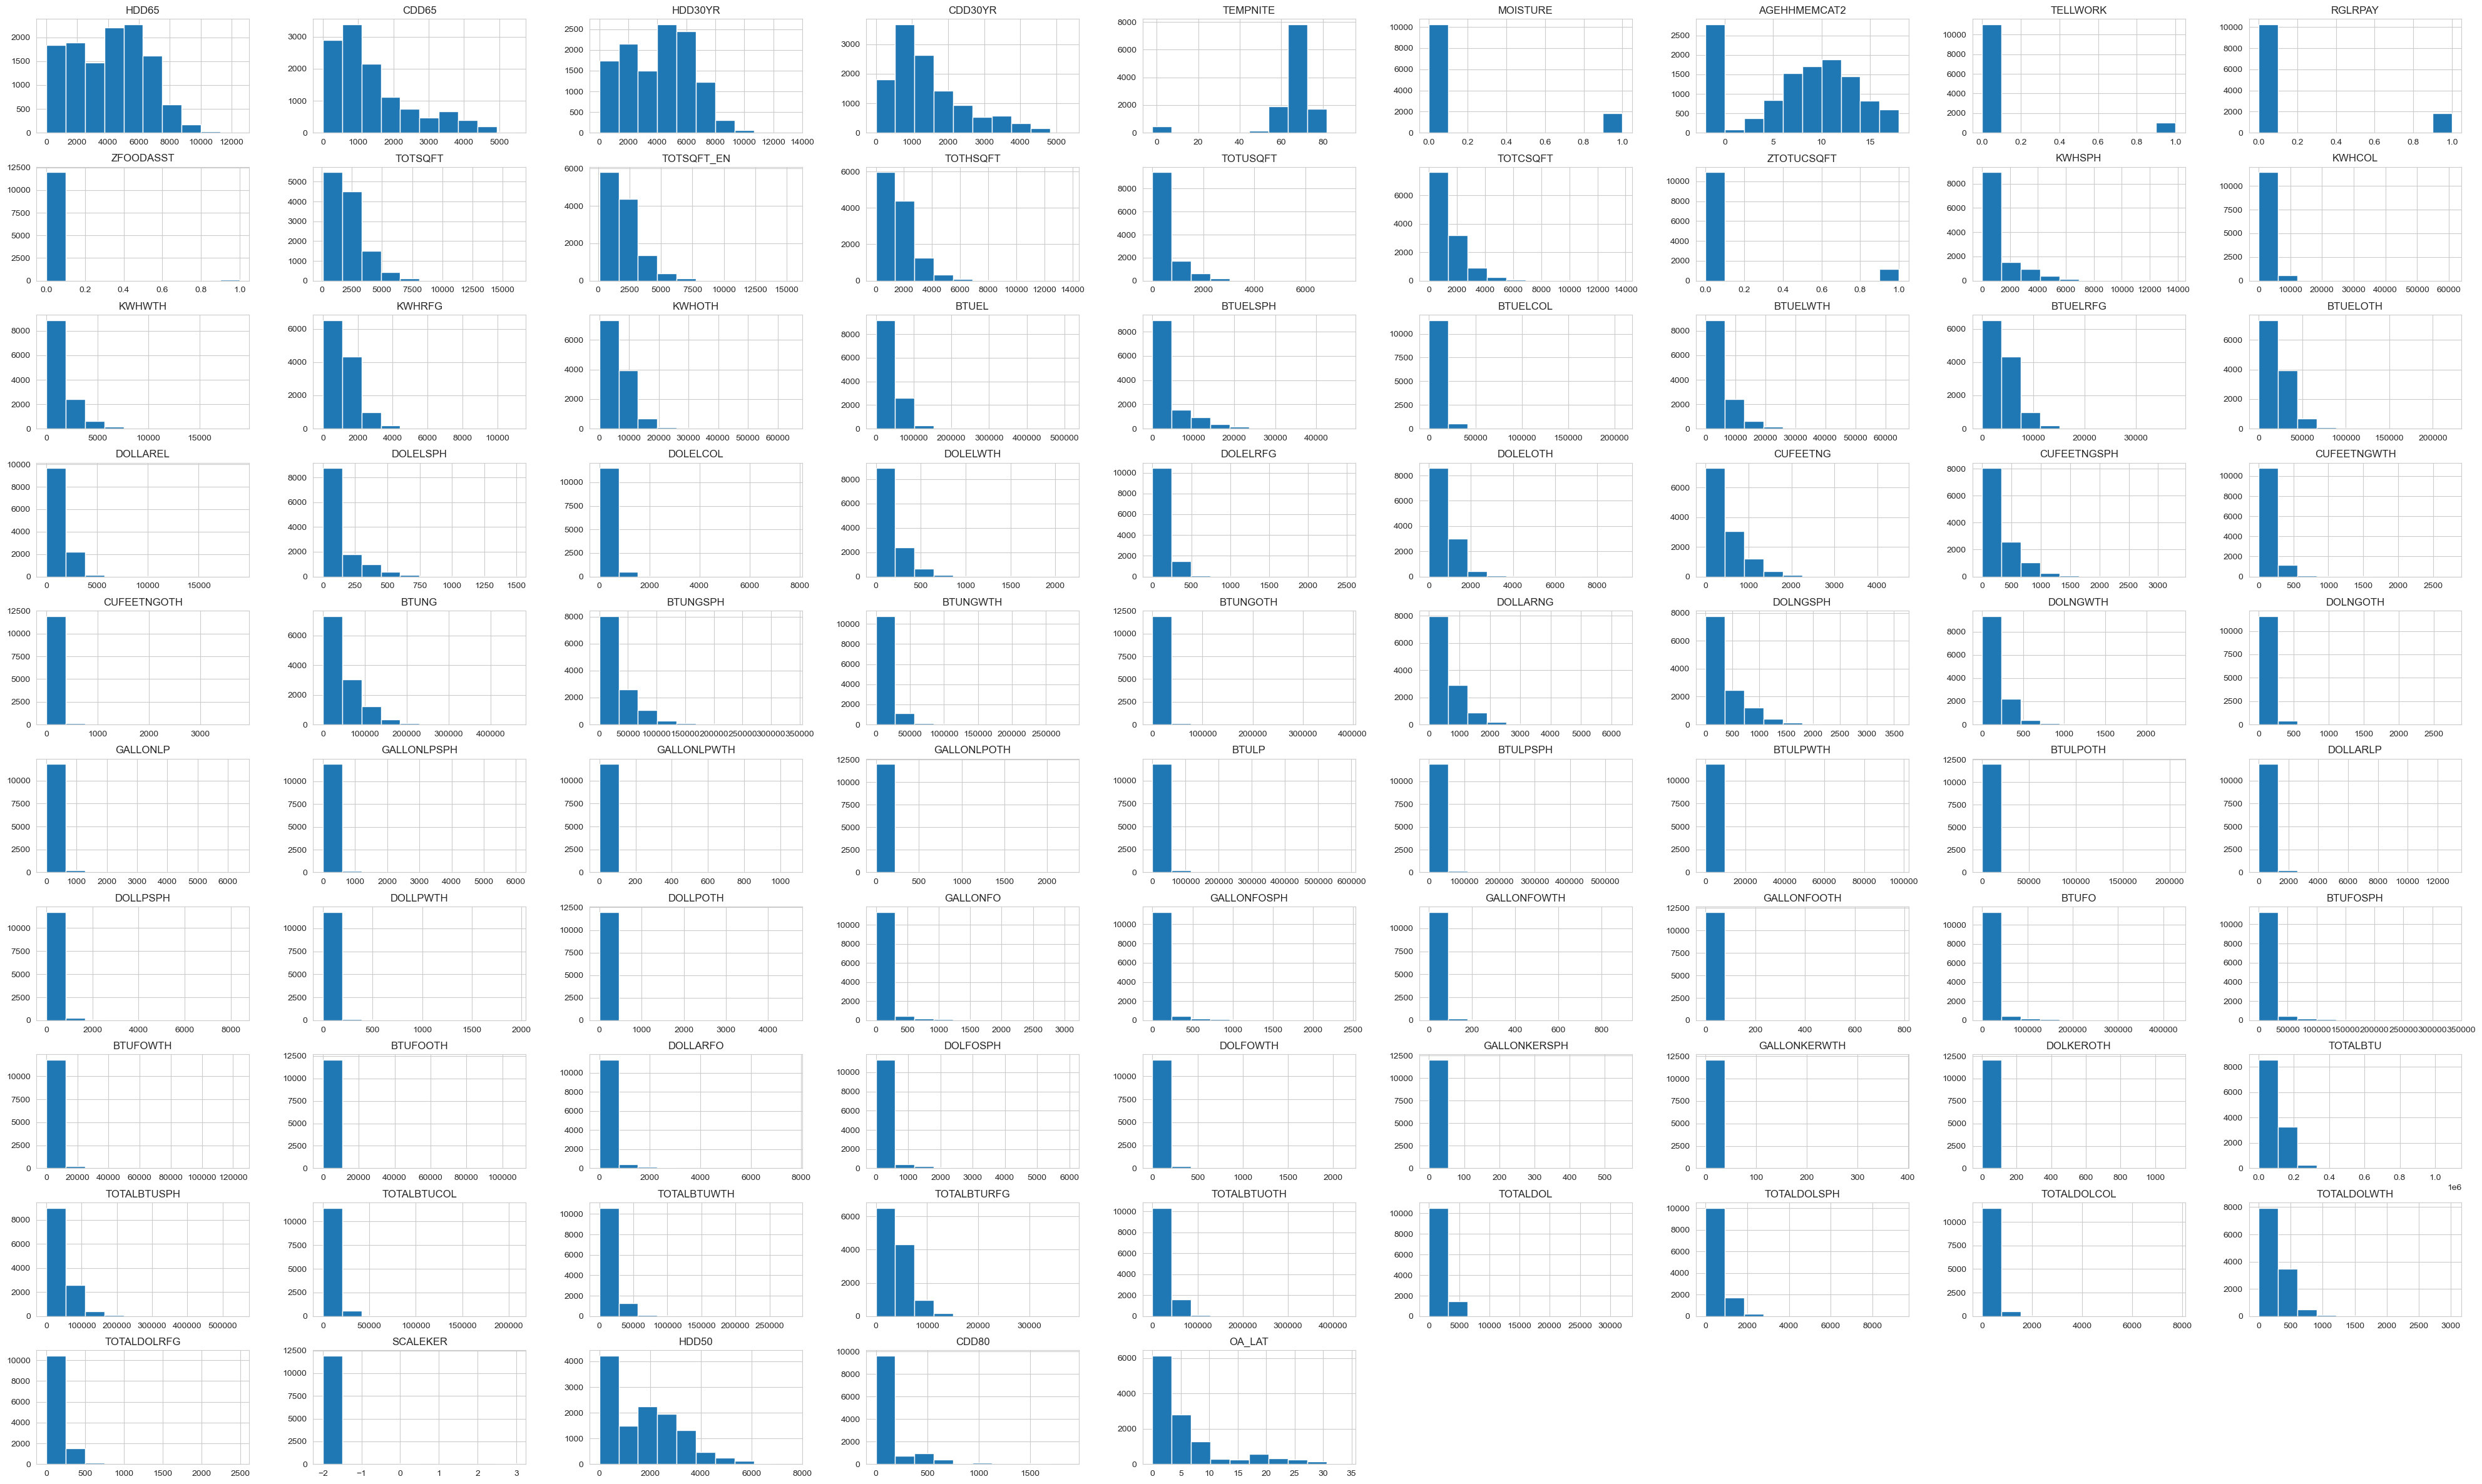

In [21]:
df[cont].hist(figsize=(50,30))
plt.show()

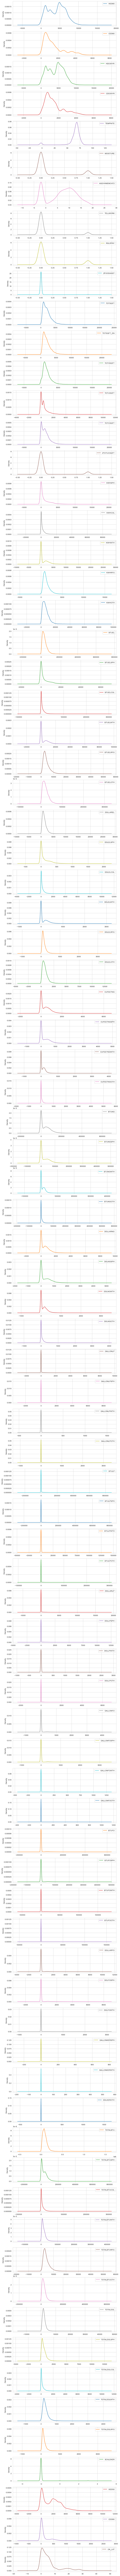

In [22]:
df[cont].plot(kind='density', subplots=True, sharex=False, figsize=(10, 250))
plt.show()

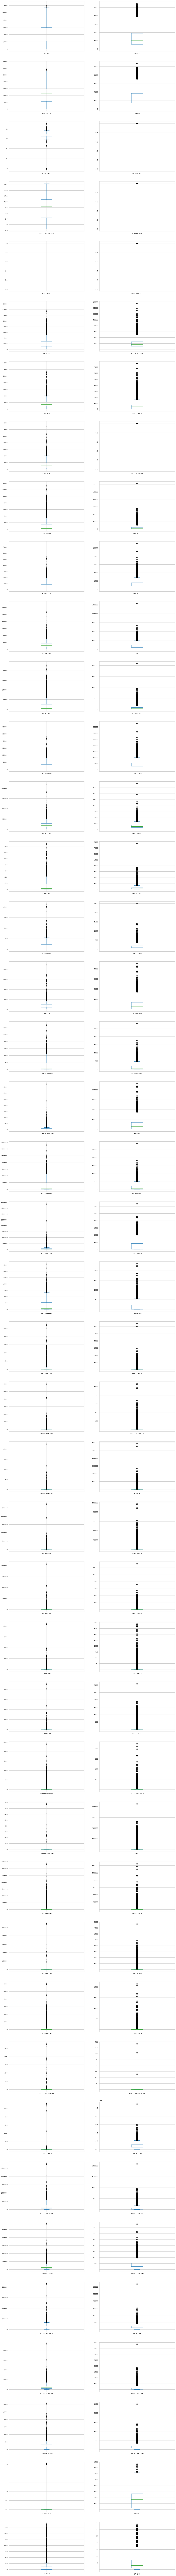

In [23]:
df[cont].plot(kind='box', 
                   subplots=True, 
                   layout=(43, 2), 
                   sharex=False, 
                   figsize=(16, 250))

plt.show()

### EDA on Some Categorical 

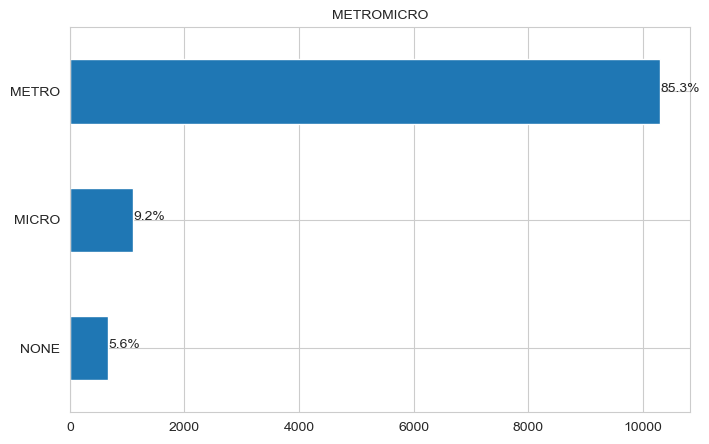

In [23]:
ax = df["METROMICRO"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("METROMICRO", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

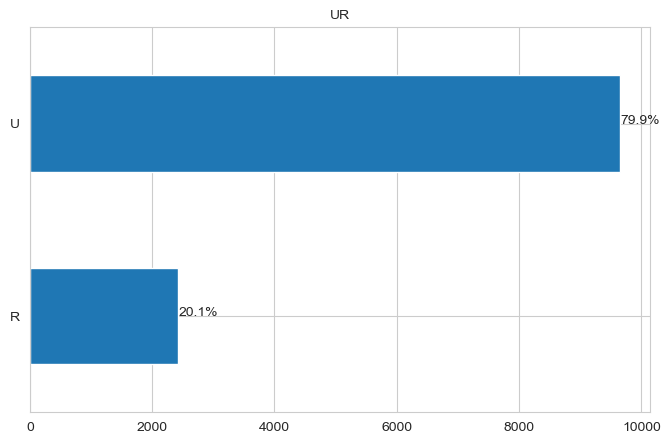

In [24]:
ax = df["UR"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("UR", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

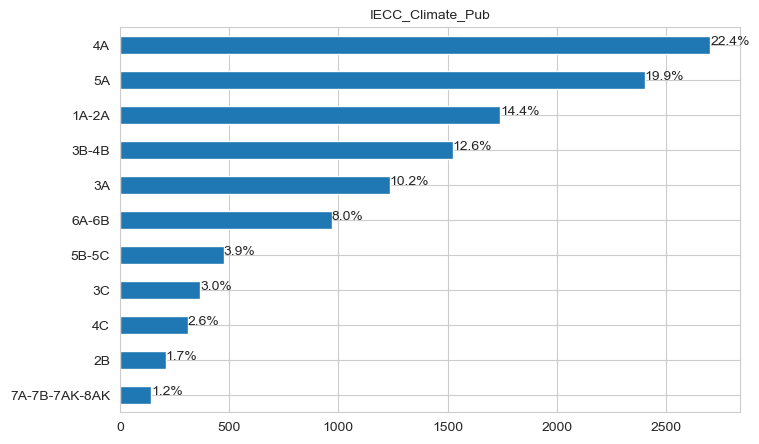

In [25]:
ax = df["IECC_Climate_Pub"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("IECC_Climate_Pub", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

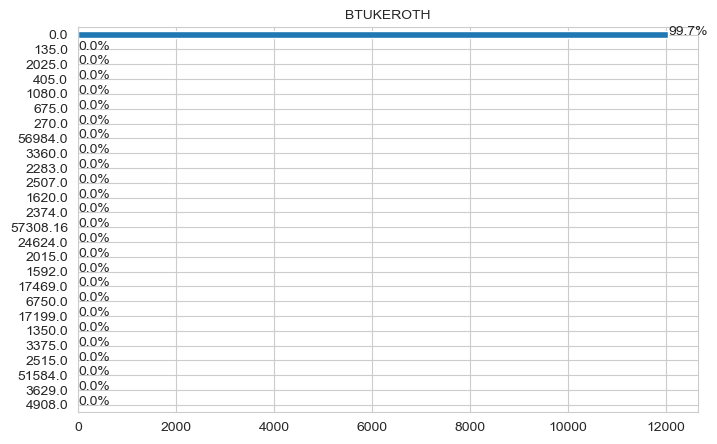

In [26]:
ax = df['BTUKEROTH'].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title('BTUKEROTH', fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

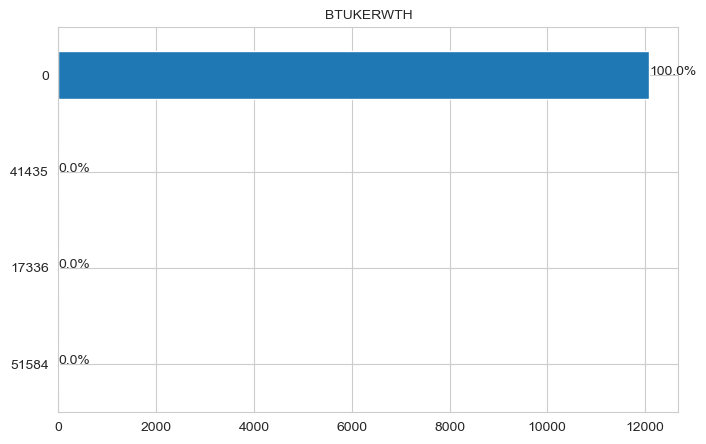

In [27]:
ax = df['BTUKERWTH'].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title('BTUKERWTH', fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

### Dealing with Categorical Variables

In [28]:
# Encoding the categorical features
df = pd.get_dummies(data = df, columns = ["METROMICRO", "UR", "IECC_Climate_Pub"], drop_first = True)
df.head()

TYPEHUQ  HDD65  CDD65  HDD30YR  CDD30YR  Climate_Region_Pub  YEARMADERANGE  \
0        2   4742   1080     4953     1271                   4              7   
1        2   2662    199     2688      143                   5              6   
2        5   6233    505     5741      829                   1              3   
3        2   6034    672     5781      868                   1              5   
4        3   5388    702     5313      797                   1              5   

   WALLTYPE  TYPEHUQ4  TOPGRILL  ...  IECC_Climate_Pub_2B  \
0         1        -2         0  ...                    0   
1         2        -2         0  ...                    0   
2         1        -2         0  ...                    0   
3         6        -2         1  ...                    0   
4         2        -2         0  ...                    0   

   IECC_Climate_Pub_3A  IECC_Climate_Pub_3B-4B  IECC_Climate_Pub_3C  \
0                    0                       0                    0   
1                    0                       0                    1   
2                    0                       0                    0   
3                    0                       0                    0   
4                    0                       0                    0   

   IECC_Climate_Pub_4A  IECC_Climate_Pub_4C  IECC_Climate_Pub_5A  \
0                    1                    0                    0   
1                    0                    0                    0   
2                    0                    0                    1   
3                    0                    0                    1   
4                    0                    0                    1   

   IECC_Climate_Pub_5B-5C  IECC_Climate_Pub_6A-6B  \
0                       0                       0   
1                       0                       0   
2                       0                       0   
3                       0                       0   
4                       0                       0   

   IECC_Climate_Pub_7A-7B-7AK-8AK  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 148 columns]

### Feature Scaling and Transformation

In [30]:
X = df.drop('KWH', axis = 1)
y = df["KWH"]

In [31]:
X

TYPEHUQ  HDD65  CDD65  HDD30YR  CDD30YR  Climate_Region_Pub  \
0            2   4742   1080     4953     1271                   4   
1            2   2662    199     2688      143                   5   
2            5   6233    505     5741      829                   1   
3            2   6034    672     5781      868                   1   
4            3   5388    702     5313      797                   1   
...        ...    ...    ...      ...      ...                 ...   
12078        2   7671    332     7784      451                   1   
12079        4   2085   2844     2520     2286                   2   
12080        2   7935    472     8074      600                   1   
12081        2   5834    770     5989      957                   1   
12082        2   2806    124     2859      139                   5   

       YEARMADERANGE  WALLTYPE  TYPEHUQ4  TOPGRILL  ...  IECC_Climate_Pub_2B  \
0                  7         1        -2         0  ...                    0   
1                  6         2        -2         0  ...                    0   
2                  3         1        -2         0  ...                    0   
3                  5         6        -2         1  ...                    0   
4                  5         2        -2         0  ...                    0   
...              ...       ...       ...       ...  ...                  ...   
12078              5         3        -2         0  ...                    0   
12079              5         1        -2         0  ...                    0   
12080              6         3        -2         0  ...                    0   
12081              1         1        -2         0  ...                    0   
12082              1         2        -2         0  ...                    0   

       IECC_Climate_Pub_3A  IECC_Climate_Pub_3B-4B  IECC_Climate_Pub_3C  \
0                        0                       0                    0   
1                        0                       0                    1   
2                        0                       0                    0   
3                        0                       0                    0   
4                        0                       0                    0   
...                    ...                     ...                  ...   
12078                    0                       0                    0   
12079                    0                       1                    0   
12080                    0                       0                    0   
12081                    0                       0                    0   
12082                    0                       0                    1   

       IECC_Climate_Pub_4A  IECC_Climate_Pub_4C  IECC_Climate_Pub_5A  \
0                        1                    0                    0   
1                        0                    0                    0   
2                        0                    0                    1   
3                        0                    0                    1   
4                        0                    0                    1   
...                    ...                  ...                  ...   
12078                    0                    0                    0   
12079                    0                    0                    0   
12080                    0                    0                    0   
12081                    0                    0                    0   
12082                    0                    0                    0   

       IECC_Climate_Pub_5B-5C  IECC_Climate_Pub_6A-6B  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
12078                       0           

In [32]:
y

0        18466
1         5148
2         2218
3        10015
4         2869
         ...  
12078     7647
12079     1813
12080     9834
12081     4800
12082     1764
Name: KWH, Length: 12083, dtype: int64

In [33]:
### Loading in Library for StandardScaler

from sklearn.preprocessing import StandardScaler

In [34]:
## scaling the dataset using StandardScaler

scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X)

In [35]:
rescaled_X.shape

(12083, 147)

In [36]:
## Converting the scaled data (Feature) to DataFrame 

rescaled_X_df = pd.DataFrame(rescaled_X, columns=X.columns)

rescaled_X_df.head(5)

TYPEHUQ     HDD65     CDD65   HDD30YR   CDD30YR  Climate_Region_Pub  \
0 -0.553091  0.259151 -0.295613  0.361810 -0.168838            1.036661   
1 -0.553091 -0.638305 -1.072089 -0.640203 -1.272874            1.777668   
2  1.962468  0.902471 -0.802394  0.710413 -0.601448           -1.186359   
3 -0.553091  0.816609 -0.655207  0.728109 -0.563276           -1.186359   
4  0.285428  0.537880 -0.628766  0.521070 -0.632768           -1.186359   

   YEARMADERANGE  WALLTYPE  TYPEHUQ4  TOPGRILL  ...  IECC_Climate_Pub_2B  \
0       1.402354 -1.149483 -0.212492 -0.117301  ...            -0.132671   
1       0.930542 -0.488438 -0.212492 -0.117301  ...            -0.132671   
2      -0.484893 -1.149483 -0.212492 -0.117301  ...            -0.132671   
3       0.458731  2.155738 -0.212492  8.525071  ...            -0.132671   
4       0.458731 -0.488438 -0.212492 -0.117301  ...            -0.132671   

   IECC_Climate_Pub_3A  IECC_Climate_Pub_3B-4B  IECC_Climate_Pub_3C  \
0            -0.337411               -0.379768            -0.177236   
1            -0.337411               -0.379768             5.642184   
2            -0.337411               -0.379768            -0.177236   
3            -0.337411               -0.379768            -0.177236   
4            -0.337411               -0.379768            -0.177236   

   IECC_Climate_Pub_4A  IECC_Climate_Pub_4C  IECC_Climate_Pub_5A  \
0             1.862852            -0.162806            -0.498111   
1            -0.536811            -0.162806            -0.498111   
2            -0.536811            -0.162806             2.007583   
3            -0.536811            -0.162806             2.007583   
4            -0.536811            -0.162806             2.007583   

   IECC_Climate_Pub_5B-5C  IECC_Climate_Pub_6A-6B  \
0               -0.202509               -0.295606   
1               -0.202509               -0.295606   
2               -0.202509               -0.295606   
3               -0.202509               -0.295606   
4               -0.202509               -0.295606   

   IECC_Climate_Pub_7A-7B-7AK-8AK  
0                       -0.109824  
1                       -0.109824  
2                       -0.109824  
3                       -0.109824  
4                       -0.109824  

[5 rows x 147 columns]

In [37]:
## Converting the Target Variable to DataFrame 

Y_df = pd.DataFrame(y)
Y_df.head()

KWH
0  18466
1   5148
2   2218
3  10015
4   2869

In [38]:
## Concating the Target (Y) and the Feature (X) variables
## Recall that the data set was splitted to all for scaling, hence the need to concat them. 

df = pd.concat([rescaled_X_df, Y_df], axis = 1)
df.head()

TYPEHUQ     HDD65     CDD65   HDD30YR   CDD30YR  Climate_Region_Pub  \
0 -0.553091  0.259151 -0.295613  0.361810 -0.168838            1.036661   
1 -0.553091 -0.638305 -1.072089 -0.640203 -1.272874            1.777668   
2  1.962468  0.902471 -0.802394  0.710413 -0.601448           -1.186359   
3 -0.553091  0.816609 -0.655207  0.728109 -0.563276           -1.186359   
4  0.285428  0.537880 -0.628766  0.521070 -0.632768           -1.186359   

   YEARMADERANGE  WALLTYPE  TYPEHUQ4  TOPGRILL  ...  IECC_Climate_Pub_3A  \
0       1.402354 -1.149483 -0.212492 -0.117301  ...            -0.337411   
1       0.930542 -0.488438 -0.212492 -0.117301  ...            -0.337411   
2      -0.484893 -1.149483 -0.212492 -0.117301  ...            -0.337411   
3       0.458731  2.155738 -0.212492  8.525071  ...            -0.337411   
4       0.458731 -0.488438 -0.212492 -0.117301  ...            -0.337411   

   IECC_Climate_Pub_3B-4B  IECC_Climate_Pub_3C  IECC_Climate_Pub_4A  \
0               -0.379768            -0.177236             1.862852   
1               -0.379768             5.642184            -0.536811   
2               -0.379768            -0.177236            -0.536811   
3               -0.379768            -0.177236            -0.536811   
4               -0.379768            -0.177236            -0.536811   

   IECC_Climate_Pub_4C  IECC_Climate_Pub_5A  IECC_Climate_Pub_5B-5C  \
0            -0.162806            -0.498111               -0.202509   
1            -0.162806            -0.498111               -0.202509   
2            -0.162806             2.007583               -0.202509   
3            -0.162806             2.007583               -0.202509   
4            -0.162806             2.007583               -0.202509   

   IECC_Climate_Pub_6A-6B  IECC_Climate_Pub_7A-7B-7AK-8AK    KWH  
0               -0.295606                       -0.109824  18466  
1               -0.295606                       -0.109824   5148  
2               -0.295606                       -0.109824   2218  
3               -0.295606                       -0.109824  10015  
4               -0.295606                       -0.109824   2869  

[5 rows x 148 columns]

### Machine Leanring

In [39]:
## Importing library for train_test splitting 

from sklearn.model_selection import train_test_split

In [40]:
### Splitting with a ratio of 70% (train), 30% (test)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.30, random_state=42)

### Random Forest 

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

### Building the Model

In [42]:
### Instantiating the RandomForest Regressor
randmf = RandomForestRegressor(random_state= 42, n_estimators = 5, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 90, bootstrap=False) 

### Fitting the training set to the model
randmf.fit( X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=90, max_features='auto',
                      n_estimators=5, random_state=42)

In [43]:
print("Training_score : " , randmf.score(X_train, y_train)) 

Training_score :  1.0


In [44]:
### Predicitng the Test data
y_pred = randmf.predict(X_test)

### Model Evaluation and Performance

In [45]:
## R2 Score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.999953731878386


In [46]:
### Adjusted R square Score

n=3625
k=147    
adj_r2_score = 1 - ((1-r2_score(y_test, y_pred))*(n-1)/(n-k-1))
print(adj_r2_score)

0.9999517757628044


In [48]:
### Mean Absolute Error Score

print("MAE",mean_absolute_error(y_test,y_pred), "\n")


print("""It is the mean of the absolute difference between the actual value in the dataset and the value predicted by the model.
The smaller the MAE, the more accurate the model is. If MAE is zero it shows the model is perfect.""")

MAE 9.074262068965526 

It is the mean of the absolute difference between the actual value in the dataset and the value predicted by the model.
The smaller the MAE, the more accurate the model is. If MAE is zero it shows the model is perfect.


In [49]:
### Mean Squared Error Score

print("MSE",mean_squared_error(y_test,y_pred))


""" This is the mean of the squared difference of the actual value in the dataset and the value predicted by the model.
"""

MSE 2369.520849655179


' This is the mean of the squared difference of the actual value in the dataset and the value predicted by the model.\n'

In [51]:
### Root Mean Absolute Error Score

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 48.677724368084206


### Comparing Actual Target Variable against Predicted Target Variable

In [53]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
"predicted_prob": y_pred } ) 
y_pred_rf1

actual  predicted_prob
5155    11486         11487.2
7034    10604         10609.8
1786    14658         14659.0
1491     9555          9556.6
2128    15845         15847.0
...       ...             ...
10661    3092          3089.6
10475   17519         17512.8
1359     6854          6851.8
334     22567         22475.2
6200     8467          8472.6

[3625 rows x 2 columns]

In [57]:
y_pred_rf1['error'] = y_pred_rf1['actual'] - y_pred_rf1['predicted_prob']
y_pred_rf1['error2'] = y_pred_rf1['error']**2
y_pred_rf1['error2'].mean()

2369.520849655179

### Decision Tree Regressor

In [58]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [59]:
print("Training_score : " , regressor.score(X_train, y_train)) 

Training_score :  1.0


In [60]:
y_pred_dec = regressor.predict(X_test)

### Model Evaluation and Performance

In [61]:
print("Testing_score : ", r2_score(y_test, y_pred_dec))

Testing_score :  0.9999283647915597


In [62]:
### Adjusted R square Score

n=3625
k=147    
adj_r2_score = 1 - ((1-r2_score(y_test, y_pred_dec))*(n-1)/(n-k-1))
print(adj_r2_score)

0.9999253362107023


In [63]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 9.074262068965526


In [64]:
### Mean Squared Error Score

print("MSE",mean_squared_error(y_test,y_pred))

MSE 2369.520849655179


In [65]:
### Root Mean Absolute Error Score

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 48.677724368084206


### Comparing the Actual Target Variable against Predicted Target Variable 

In [66]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
"predicted_prob": y_pred_dec } ) 
y_pred_rf1

actual  predicted_prob
5155    11486         11488.0
7034    10604         10605.0
1786    14658         14669.0
1491     9555          9560.0
2128    15845         15847.0
...       ...             ...
10661    3092          3089.0
10475   17519         17520.0
1359     6854          6853.0
334     22567         22476.0
6200     8467          8473.0

[3625 rows x 2 columns]

In [1]:
import pandas as pd

In [2]:
air = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\Youcam\Train.csv')
air

id                   site_id  site_latitude  site_longitude  \
0     id_vjcx08sz91  6531a46a89b3300013914a36       6.532570        3.399360   
1     id_bkg215syli  6531a46a89b3300013914a36       6.532570        3.399360   
2     id_oui2pot3qd  6531a46a89b3300013914a36       6.532570        3.399360   
3     id_9aandqzy4n  6531a46a89b3300013914a36       6.532570        3.399360   
4     id_ali5x2m4iw  6531a46a89b3300013914a36       6.532570        3.399360   
...             ...                       ...            ...             ...   
8066  id_ov6ddbfdf0  647f3a5d69df500029a2fc93      -1.268877       36.819139   
8067  id_3tv6i1a09t  647f3a5d69df500029a2fc93      -1.268877       36.819139   
8068  id_csqjqt3f9i  647f3a5d69df500029a2fc93      -1.268877       36.819139   
8069  id_tv6dzkz7ii  647f3a5d69df500029a2fc93      -1.268877       36.819139   
8070  id_qgxtderh4p  647f3a5d69df500029a2fc93      -1.268877       36.819139   

         city  country        date  hour  \
0       Lagos  Nigeria  2023-10-25    13   
1       Lagos  Nigeria  2023-11-02    12   
2       Lagos  Nigeria  2023-11-03    13   
3       Lagos  Nigeria  2023-11-08    14   
4       Lagos  Nigeria  2023-11-09    13   
...       ...      ...         ...   ...   
8066  Nairobi    Kenya  2024-01-17    10   
8067  Nairobi    Kenya  2024-01-24    11   
8068  Nairobi    Kenya  2024-01-25    11   
8069  Nairobi    Kenya  2024-01-26    10   
8070  Nairobi    Kenya  2024-01-27    10   

      sulphurdioxide_so2_column_number_density  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                     0.000267   
...                                        ...   
8066                                       NaN   
8067                                 -0.000563   
8068                                       NaN   
8069                                 -0.000188   
8070                                  0.000089   

      sulphurdioxide_so2_column_number_density_amf  ...  \
0                                              NaN  ...   
1                                              NaN  ...   
2                                              NaN  ...   
3                                              NaN  ...   
4                                         0.774656  ...   
...                                            ...  ...   
8066                                           NaN  ...   
8067                                      0.595788  ...   
8068                                           NaN  ...   
8069                                      0.746123  ...   
8070                                      0.752415  ...   

      cloud_cloud_top_height  cloud_cloud_base_pressure  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                6791.682888               51171.802486   
3                        NaN                        NaN   
4                1451.050659               96215.906250   
...                      ...                        ...   
8066                     NaN                        NaN   
8067                     NaN                        NaN   
8068                     NaN                        NaN   
8069                     NaN                        NaN   
8070             3458.536865               76573.898438   

      cloud_cloud_base_height  cloud_cloud_optical_depth  \
0                         NaN                        NaN   
1                         NaN                        NaN   
2                 5791.682829                  11.816715   
3                         NaN                        NaN   
4                  451.050598                  10.521009   
...                       ...                        ...   
8066                      NaN                        NaN   
8067                      Na

In [5]:
# Check for missing values
missing_values = air.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(air)) * 100

missing_percentage = pd.DataFrame(missing_percentage)
missing_values - pd.DataFrame(missing_values)

missing_values

# Display the missing data statistics
#print("Missing Values in Each Column:\n", missing_values)
#print("\nPercentage of Missing Data:\n", missing_percentage)

id                               0
site_id                          0
site_latitude                    0
site_longitude                   0
city                             0
                              ... 
cloud_sensor_azimuth_angle    3077
cloud_sensor_zenith_angle     3077
cloud_solar_azimuth_angle     3077
cloud_solar_zenith_angle      3077
pm2_5                            0
Length: 80, dtype: int64